In [44]:
import getpass
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2

from netCDF4 import Dataset
from pyproj import Proj
from psycopg2.extras import RealDictCursor

In [2]:
password = getpass.getpass()

········


In [85]:
conn = psycopg2.connect("dbname='ccgeodb' user='linda_ml' host='10.0.18.10' password='%s'" % (password))

In [86]:
cursor = conn.cursor(cursor_factory=RealDictCursor)

In [87]:
cursor.execute("""select year, plotid, easting, northing, landuseclass,
volpine, volcontorta, volspruce, volbirch, volotherdec from se_slu.swe_nfi_plot_measured""")

In [88]:
results = cursor.fetchall()

In [89]:
df_swe_plots = pd.DataFrame(results)

In [90]:
df_swe_plots["volpine"] = pd.to_numeric(df_swe_plots["volpine"])
df_swe_plots["volspruce"] = pd.to_numeric(df_swe_plots["volspruce"])
df_swe_plots["volcontorta"] = pd.to_numeric(df_swe_plots["volcontorta"])
df_swe_plots["volbirch"] = pd.to_numeric(df_swe_plots["volbirch"])
df_swe_plots["volotherdec"] = pd.to_numeric(df_swe_plots["volotherdec"])

In [91]:
df_swe_plots.size

242390

In [92]:
df_swe_plots["pine_spruce_ratio"] = df_swe_plots["volpine"] / (df_swe_plots["volpine"] + df_swe_plots["volspruce"])

In [93]:
df_swe.head()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,volspruce,volotherdec,voltotal,volbirchpct,volcontortapct,volpinepct,volsprucepct,i,j
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.13433797,0,0,275.743796,0E+8,353.87813397,0.2207944782952422665053876089,0E+8,0E+8,0.7792055217047577334946123911,56,29
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0,0,0,3.92842009,0E+8,3.92842009,0E+8,0E+8,0E+8,1,56,29
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.31578358,0,0,0,0E+8,84.31578358,1,0E+8,0E+8,0E+8,56,29
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0,0,0,216.1313016,0.1332282491920871792488619058,249.35203691,0E+8,0E+8,0E+8,0.8667717508079128207511380942,56,30
5,2007,306,Skogsm,670513,7114896,18.502274,64.118376,16.05170844,0,230.9016497,20.43003765,0E+8,267.38339579,0.06003255509779985205415660489,0E+8,0.8635601661718277932863259639,0.07640727873037235465951743121,56,30


In [94]:
proj = Proj("+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [95]:
lon, lat = proj(df_swe_plots['easting'].values, df_swe_plots['northing'].values, inverse=True)

In [96]:
lat

array([64.13469673, 64.13449269, 64.13430454, ..., 55.50231473,
       55.50770376, 55.4805521 ])

In [97]:
df_swe_plots["longitude"] = lon

In [98]:
df_swe_plots["latitude"] = lat

In [99]:
df_swe_plots.columns

Index(['easting', 'landuseclass', 'northing', 'plotid', 'volbirch',
       'volcontorta', 'volotherdec', 'volpine', 'volspruce', 'year',
       'pine_spruce_ratio', 'longitude', 'latitude'],
      dtype='object')

In [100]:
df_swe_plots = df_swe_plots.reindex(['year', 'plotid', 'landuseclass', 'easting', 'northing', 
                           'longitude', 'latitude', 'volbirch', 'volcontorta', 
                           'volpine', 'volspruce', 'volotherdec', 'pine_spruce_ratio'],
                         axis = 1)

In [101]:
df_swe_plots["voltotal"] = df_swe_plots["volbirch"] + \
    df_swe_plots["volcontorta"] + \
    df_swe_plots["volpine"] + \
    df_swe_plots["volspruce"] + \
    df_swe_plots["volotherdec"]

In [102]:
df_swe_plots.head()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,volspruce,volotherdec,pine_spruce_ratio,voltotal
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.134338,0.0,0.0,275.743796,0.000000,0.0,353.878134
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0.000000,0.0,0.0,3.928420,0.000000,0.0,3.928420
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.315784,0.0,0.0,0.000000,0.000000,NaN,84.315784
3,2007,212,Skogsm,671110,7115502,18.515195,64.123509,0.000000,0.0,0.0,0.000000,0.000000,NaN,0.000000
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0.000000,0.0,0.0,216.131302,33.220735,0.0,249.352037


In [103]:
df_swe_plots.to_csv("swe_plots.csv", index=False)

In [19]:
df_swe = df_swe_plots.loc[df_swe_plots["voltotal"] > 0]

In [20]:
df_swe["volbirchpct"] = df_swe["volbirch"]/df_swe["voltotal"]
df_swe["volcontortapct"] = df_swe["volcontorta"]/df_swe["voltotal"]
df_swe["volpinepct"] = df_swe["volpine"]/df_swe["voltotal"]
df_swe["volsprucepct"] = df_swe["volspruce"]/df_swe["voltotal"]
df_swe["volotherdec"] = df_swe["volotherdec"]/df_swe["voltotal"]

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [21]:
df_swe.head()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,volspruce,volotherdec,voltotal,volbirchpct,volcontortapct,volpinepct,volsprucepct
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.13433797,0,0,275.743796,0E+8,353.87813397,0.2207944782952422665053876089,0E+8,0E+8,0.7792055217047577334946123911
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0,0,0,3.92842009,0E+8,3.92842009,0E+8,0E+8,0E+8,1
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.31578358,0,0,0,0E+8,84.31578358,1,0E+8,0E+8,0E+8
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0,0,0,216.1313016,0.1332282491920871792488619058,249.35203691,0E+8,0E+8,0E+8,0.8667717508079128207511380942
5,2007,306,Skogsm,670513,7114896,18.502274,64.118376,16.05170844,0,230.9016497,20.43003765,0E+8,267.38339579,0.06003255509779985205415660489,0E+8,0.8635601661718277932863259639,0.07640727873037235465951743121


In [22]:
dataset = Dataset("era5-nordics-rh_daily.nc")

In [23]:
dataset.file_format

'NETCDF3_64BIT_OFFSET'

In [24]:
dataset.dimensions.keys()

odict_keys(['time', 'longitude', 'latitude'])

In [25]:
lon = np.array(dataset["longitude"])

In [26]:
lat = np.array(dataset["latitude"])

In [27]:
lon

array([ 4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25,
       31.5 , 31.75, 32.  ], dtype=float32)

In [28]:
lat

array([71.5 , 71.25, 71.  , 70.75, 70.5 , 70.25, 70.  , 69.75, 69.5 ,
       69.25, 69.  , 68.75, 68.5 , 68.25, 68.  , 67.75, 67.5 , 67.25,
       67.  , 66.75, 66.5 , 66.25, 66.  , 65.75, 65.5 , 65.25, 65.  ,
       64.75, 64.5 , 64.25, 64.  , 63.75, 63.5 , 63.25, 63.  , 62.75,
       62.5 , 62.25, 62.  , 61.75, 61.5 , 61.25, 61.  , 60.75, 60.5 ,
       60.25, 60.  , 59.75, 59.5 , 59.25, 59.  , 58.75, 58.5 , 58.25,
       58.  , 57.75, 57.5 , 57.25, 57.  , 56.75, 56.5 , 56.25, 56.  ,
       55.75, 55.5 , 55.25, 55.  , 54.75, 54.5 , 54.25, 54.  , 53.75,
       53.5 ], dtype=float32)

In [29]:
delta_lon = lon[1] - lon[0]
delta_lat = lat[1] - lat[0]
(delta_lon, delta_lat)

(0.25, -0.25)

In [30]:
llat = lat.min()
ulat = lat.max()
llon = lon.min()
ulon = lon.max()
(llon, llat, ulon, ulat)

(4.5, 53.5, 32.0, 71.5)

In [31]:
grid = np.zeros((lon.shape[0], lat.shape[0]))

In [32]:
grid.shape

(111, 73)

In [33]:
# find corresponding pixel of each plot

In [34]:
df_swe["i"] = df_swe["longitude"].apply(lambda x: int(round((x - lon[0]) / delta_lon)))
df_swe["j"] = df_swe["latitude"].apply(lambda x: int(round((x - lat[0]) / delta_lat)))

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
df_swe

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,volspruce,volotherdec,voltotal,volbirchpct,volcontortapct,volpinepct,volsprucepct,i,j
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.13433797,0,0,275.743796,0E+8,353.87813397,0.2207944782952422665053876089,0E+8,0E+8,0.7792055217047577334946123911,56,29
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0,0,0,3.92842009,0E+8,3.92842009,0E+8,0E+8,0E+8,1,56,29
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.31578358,0,0,0,0E+8,84.31578358,1,0E+8,0E+8,0E+8,56,29
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0,0,0,216.1313016,0.1332282491920871792488619058,249.35203691,0E+8,0E+8,0E+8,0.8667717508079128207511380942,56,30
5,2007,306,Skogsm,670513,7114896,18.502274,64.118376,16.05170844,0,230.9016497,20.43003765,0E+8,267.38339579,0.06003255509779985205415660489,0E+8,0.8635601661718277932863259639,0.07640727873037235465951743121,56,30
6,2007,312,Skogsm,669921,7114888,18.490133,64.118596,30.30101476,0,0,5.976354417,0E+9,36.277369177,0.8352594316351629744862741704,0E+9,0E+9,0.1647405683648370255137258296,56,30
7,2007,406,Skogsm,669310,7115473,18.478267,64.124136,38.04979635,0,12.42691957,112.5314848,0E+8,163.00820072,0.2334225896730086918046683658,0E+8,0.07623493489966055003517862276,0.6903424754273307581601530115,56,30
8,2007,412,Skogsm,669303,7116075,18.478799,64.129532,0,0,0,6.444906443,0E+9,6.444906443,0E+9,0E+9,0E+9,1,56,29
10,2007,106,Skogsm,629720,7131172,17.679743,64.281995,5.878913856,1.649993502,0,0,0E+9,7.528907358,0.7808455565273008104929852160,0.2191544434726991895070147840,0E+9,0E+9,53,29
11,2007,112,Skogsm,630318,7131180,17.692087,64.281840,0,19.23076923,0,0,0E+8,19.23076923,0E+8,1,0E+8,0E+8,53,29


In [104]:
df_swe.columns

Index(['year', 'plotid', 'landuseclass', 'easting', 'northing', 'longitude',
       'latitude', 'volbirch', 'volcontorta', 'volpine', 'volspruce',
       'volotherdec', 'voltotal', 'volbirchpct', 'volcontortapct',
       'volpinepct', 'volsprucepct', 'i', 'j'],
      dtype='object')

In [37]:
rows = lat.shape[0]
columns = lon.shape[0]
size = (rows, columns)
voltotal = np.zeros(size)
volbirch = np.zeros(size)
volcontorta = np.zeros(size)
volpine = np.zeros(size)
volspruce = np.zeros(size)
volotherdec = np.zeros(size)

for idx, row in df_swe.iterrows():
    i = row.i
    j = row.j
    voltotal[j][i] += float(row.voltotal)
    volbirch[j][i] += float(row.volbirch)
    volcontorta[j][i] += float(row.volcontorta)
    volpine[j][i] += float(row.volpine)
    volotherdec[j][i] += float(row.volotherdec)
    volspruce[j][i] += float(row.volspruce)

In [38]:
voltotal[np.where(voltotal > 0)]

array([ 401.36581378,  129.27613489,  352.02834752, ..., 1295.8827936 ,
       1183.40480084,  653.47417879])

In [39]:
np.seterr(divide='ignore', invalid='ignore')
volbirchpct = volbirch / voltotal
volcontortapct = volcontorta / voltotal
volpinepct = volpine / voltotal
volsprucepct = volspruce / voltotal
volotherdecpct = volotherdec / voltotal

volfinal = volbirchpct + volcontortapct + volpinepct + volsprucepct + volotherdecpct

In [40]:
vol_pine_spruce = volpine/(volpine + volspruce)

# PINE/SPRUCE ratio

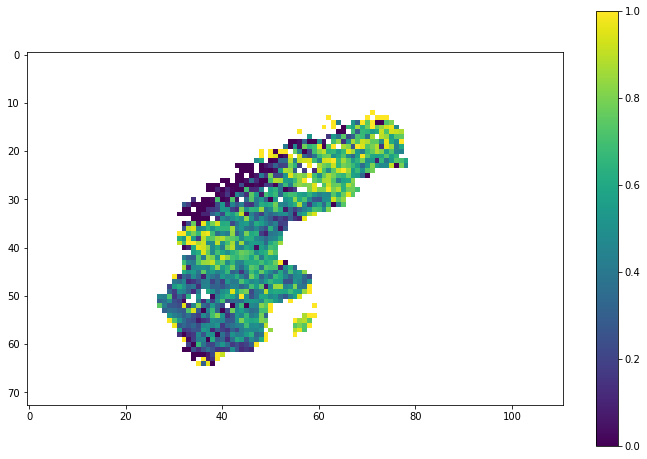

In [41]:
plt.figure(figsize=(12,8))
plt.imshow(vol_pine_spruce)
plt.colorbar()

In [43]:
dataset = Dataset("pine_spruce.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = vol_pine_spruce
dataset.close()

# BIRCH

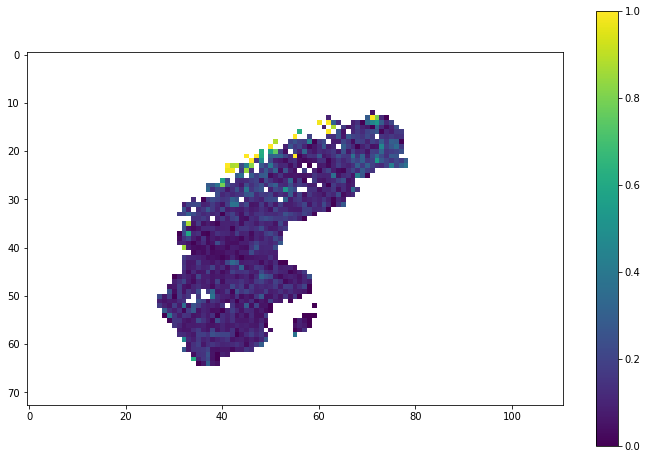

In [39]:
plt.figure(figsize=(12,8))
plt.imshow(volbirchpct)
plt.colorbar()

In [109]:
dataset = Dataset("birch.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volbirchpct
dataset.close()

In [110]:
np.savez('birch.npz', volbirchpct)

# CONTORTA

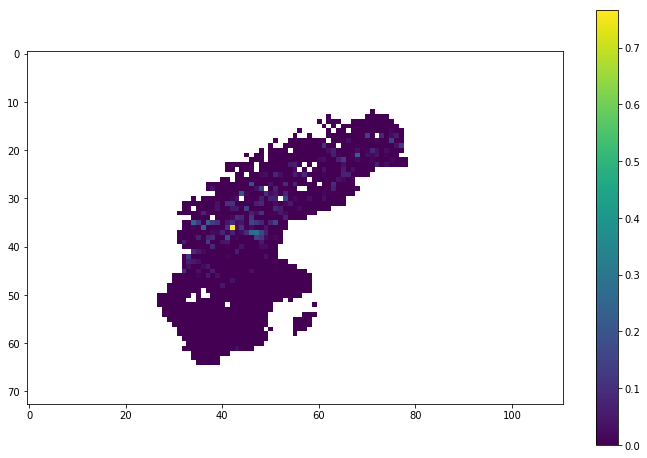

In [41]:
plt.figure(figsize=(12,8))
plt.imshow(volcontortapct)
plt.colorbar()

In [111]:
dataset = Dataset("contorta.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volcontortapct
dataset.close()

In [112]:
np.savez('contorta.npz', volcontortapct)

# PINE

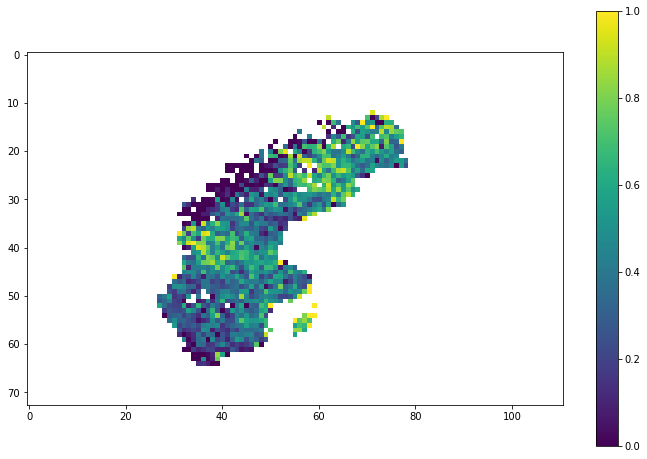

In [43]:
plt.figure(figsize=(12,8))
plt.imshow(volpinepct)
plt.colorbar()

In [113]:
dataset = Dataset("pine.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volpinepct
dataset.close()

In [114]:
np.savez('pine.npz', volpinepct)

# SPRUCE

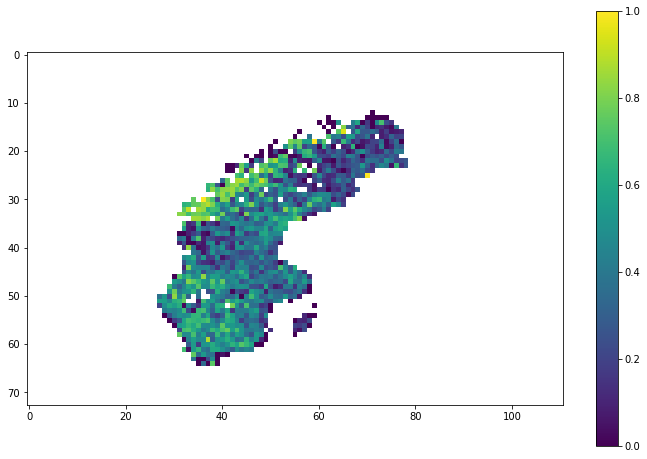

In [94]:
plt.figure(figsize=(12,8))
plt.imshow(volsprucepct)
plt.colorbar()

In [115]:
dataset = Dataset("spruce.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volsprucepct
dataset.close()

In [116]:
np.savez('spruce.npz', volsprucepct)

# OTHERDEC

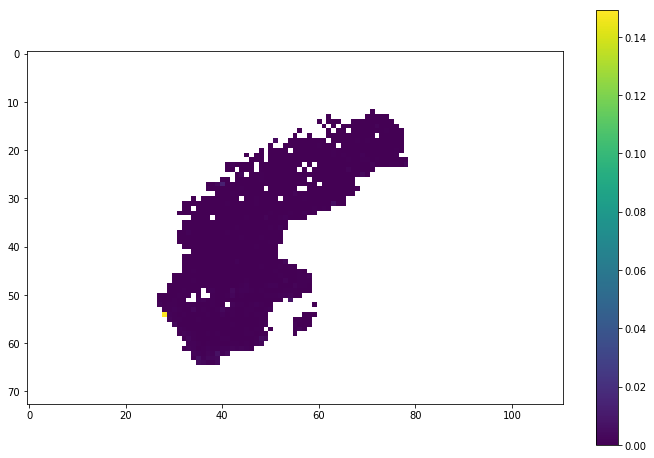

In [47]:
plt.figure(figsize=(12,8))
plt.imshow(volotherdecpct)
plt.colorbar()

In [108]:
dataset = Dataset("otherdec.nc", "w", format="NETCDF4_CLASSIC")
dataset.createDimension("latitude", lat.shape[0])
dataset.createDimension("longitude", lon.shape[0])
latitude = dataset.createVariable("latitude", np.float32, ("latitude",))
longitude = dataset.createVariable("longitude", np.float32, ("longitude",))
volume = dataset.createVariable("volume", np.float32, ("latitude", "longitude"))
latitude[:] = lat
longitude[:] = lon
volume[:,:] = volotherdecpct
dataset.close()

In [48]:
np.savez('otherdec.npz', volotherdecpct)

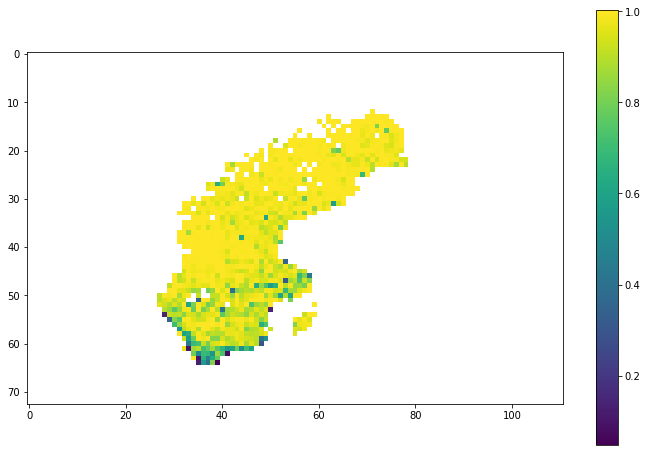

In [49]:
plt.figure(figsize=(12,8))
plt.imshow(volfinal)
plt.colorbar()